# DEVOIR 1 #

BAHLOUL Wassila Matricule: 20183065

## Exercice 1: ##

In [4]:
using JuMP, HiGHS

mo = Model(HiGHS.Optimizer)

@variable(mo, 0<=x[1:2])

@constraint(mo, c1, 3 * x[1] + 1 * x[2] <= 480)
@constraint(mo, c2, 1 * x[1] + 1 * x[2] <= 350)
@constraint(mo, c3, x[1] >= 0)
@constraint(mo, c4, x[2] >= 0)

@objective(mo, Max, 30 * x[1] + 15 * x[2])

println(mo)

optimize!(mo)

@show value.(x)

@show objective_value(mo)

Max 30 x[1] + 15 x[2]
Subject to
 c3 : x[1] >= 0
 c4 : x[2] >= 0
 c1 : 3 x[1] + x[2] <= 480
 c2 : x[1] + x[2] <= 350
 x[1] >= 0
 x[2] >= 0

Running HiGHS 1.5.3 [date: 1970-01-01, git hash: 45a127b78]
Copyright (c) 2023 HiGHS under MIT licence terms
Presolving model
2 rows, 2 cols, 4 nonzeros
2 rows, 2 cols, 4 nonzeros
Presolve : Reductions: rows 2(-2); columns 2(-0); elements 4(-2)
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0    -4.4999962776e+01 Ph1: 2(6); Du: 2(45) 0s
          2    -6.2250000000e+03 Pr: 0(0) 0s
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Simplex   iterations: 2
Objective value     :  6.2250000000e+03
HiGHS run time      :          0.00
value.(x) = [65.0, 285.0]
objective_value(mo) = 6225.0


6225.0

Running HiGHS 1.5.3 [date: 1970-01-01, git hash: 45a127b78]
Copyright (c) 2023 HiGHS under MIT licence terms
Presolving model
2 rows, 2 cols, 4 nonzeros
2 rows, 2 cols, 4 nonzeros
Presolve : Reductions: rows 2(-2); columns 2(-0); elements 4(-2)
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0     0.0000000000e+00 Ph1: 0(0) 0s
          2    -6.2250000000e+03 Pr: 0(0) 0s
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Simplex   iterations: 2
Objective value     :  6.2250000000e+03
HiGHS run time      :          0.00
Solution optimale:
Tomates (acres):65.0
Maïs (acres):285.0
Profit maximum:6225.0


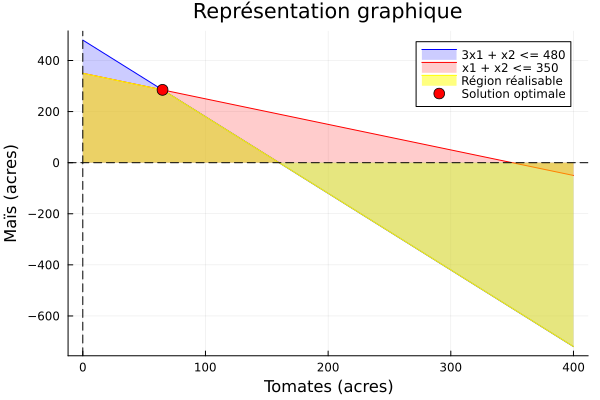

In [49]:
using JuMP, HiGHS, Plots 

mo = Model(HiGHS.Optimizer)

@variable(mo, 0 <= x[1:2] <= 350)

@constraint(mo, c1, 3 * x[1] + x[2] <= 480)
@constraint(mo, c2, x[1] + x[2] <= 350)
@constraint(mo, c3, x[1] >= 0)
@constraint(mo, c4, x[2] >= 0)

@objective(mo, Max, 30 * x[1] + 15 * x[2])
optimize!(mo)

x_optimal = value.(x)

println("Solution optimale:")
println("Tomates (acres):", x_optimal[1])
println("Maïs (acres):", x_optimal[2])
println("Profit maximum:", objective_value(mo))

x1_values = 0:1:400
x2_values_c1 = [480 - 3 * x1 for x1 in x1_values]
x2_values_c2 = [350 - x1 for x1 in x1_values]

plt = plot(x1_values, x2_values_c1, fill = (0, 0.2, :blue), color = :blue, label = "3x1 + x2 <= 480", xlabel = "Tomates (acres)", ylabel = "Maïs (acres)")
plot!(x1_values, x2_values_c2, fill = (0, 0.2, :red), color = :red, label = "x1 + x2 <= 350")
plot!(x1_values, [min(480 - 3 * x1, 350 - x1,) for x1 in x1_values], fill = (0, 0.5, :yellow), color = :yellow, label = "Région réalisable")

hline!([0], color = :black, linestyle = :dash, label ="")
vline!([0], color = :black, linestyle = :dash, label ="")

scatter!([x_optimal[1]], [x_optimal[2]], label = "Solution optimale", color = :red, markersize = 6)
plot!(title = "Représentation graphique")

display(plt)


Ne pas considérer la partie negative ( sous l'axe des abscisses).

## Exercice 2: ##

Ce problème de programmation linéaire revient à minimiser la somme Z de la forme:
Z = c1x1 + c2x2 + ... + cnxn
soit la somme A = a1x1 + a2x2 + ... + anxn ≤ b (avec ci, ai, et b sont des constantes, et xi sont les variables de décision).

Supposer que xk est une variable de base dans la solution optimale du problème revient à admettre que la valeur objective Z est minimale sous les contraintes données à l'indice k.

Afin de prouver que la solution optimale est de la forme spécifiée, nous supposons que xk est une variable de base dans la solution optimale. De ce fait, xk est non nul.

Afin de considérer un voisinage de la solution optimale, choississons une valeur t>0 suffisamment petite, de sorte que xk - t > 0. 
Modifions xk en (xk - t) dans la solutoin optimale. 

De ce fait nous avons une nouvelle somme, 
Z' = c1x1 + c2x2 + ... + ck (xk - t)+ ... + cnxn

La différence Z - Z' = (a1x1 + a2x2 + ... + akxk + ... + anxn) - ckt
-> La somme (a1x1 + a2x2 + ... + akxk + ... + anxn) est inférieure ou égale à b en fonction des contraintes du problème (Car xk est une variable de base).
De ce fait, Z - Z' est strictement négatif (Z<Z'). de cette comparaison, nous montrons que la valeur objective Z est minimale.

Nous pouvons conclure que si xk est une variable de base dans la solution optimale, alors elle doit être la seule variable de base non nulle dans cette solution. 
Cela confirme que la solution optimale est de la forme spécifiée, avec l'indice k.



## Exercice 3: ##

#### corollaire 1 #### 

On sait que si un point x d'un ensemble K convexe non vide est un point extrême s'il n'existe pas deux points distincts x1 et x2 dans K tel que:
x= ⍺x1 + (1 - ⍺)x2 pour un certains ⍺ ( 0<⍺<1).
Si x est une solution de base réalisable appartenant à K alors x est un point extrême de K.
Un système d'équations linéaires à n variables, de la forme AX = b possède une solution si et seulement si le rang de la matrice des coefficients A est égal à celui de la matrice augmentée (A|b).


Supposons par l'absurde que K n'admet aucun point extrême. 
Un point x dans l'ensemble non-vide K est un point extrême s'il ne peut pas être exprimé comme une combinaison convexe de deux points distincts de K. 

Definissons l'ensemble S comme suit:
S = {x ∈ K |∃ x1, x2 ∈ K, x ≠x1 et x2, 0 < α < 1, tels que x = αx1 + (1 - α)x2}
Ainsi, S est l'ensemble de tous les points x de l'ensemble convexe K qui peuvent etre exprimés comme une combinaison convexe de deux points disctincts de K. 

Considérons un point arbitraire x_a dans K. 
Sachant que nous avons supposé que K n'admet aucun point extrême alors il existe un x1_a et un x2_a dans l'ensemble K avec x_a ≠ x1_a et x_a ≠ x2_a et un coefficient α_a (tel que 0<⍺_a<1) de telle sorte que x_a = α_a*x1_a + (1 - α_a)x2_a.
Ainsi l'ensemble S est non-vide. 

Nous devons demontrer que S est un sous-ensmeble convexe de l'ensemble K. Pour ce faire, nous supposons que x1 et x2 sont deux points distincts de S et que x est une combinaison convexe de x1 et x2 (x = αx1 + (1 - α)x2, avec 0 < α < 1.)

Comme x1 et x2 sont danl'ensemble s S, il existe x3, x4, tels que x1 ≠ x3, x1 ≠ x4, x2 ≠ x3, x2 ≠ x4, et 0 < β < 1, tel que x1 = βx3 + (1 - β)x4 et x2 = βx3 + (1 - β)x De cette manière nous pouvons exprimer x comme une combinaison convexe de x3 et x4, justifiant ainsi que x appartient egalement à l'ensemble S, rendant ainsi l'ensemble S convexe.

De ce fait, L'ensemble S est un ensemble convexe non-vide et également sous-ensemble de l'ensemble K. Ceci signifie que S admet au moins un point extrême, entraînant le fait que notre supposition par l'absurde est incorrecte. 

Ainsi, nous pouvons conclure que K admet au moins un point extreme.

#### corollaire 2 ####

Supposons qu'il existe une solution optimale finie dans le problème de programmation linéaire. Cela signifie que nous cherchons à optimiser une fonction linéaire, que ce soit pour la maximisation ou la minimisation. Le problème linéaire est soumis à des contraintes linéaires qui définissent une région réalisable dans un espace.

le problème est: K = {x | Ax = b, x>= 0}
Sous les contraintes : Ax ≤ b, x ≥ 0,

où c est le vecteur de coefficients de la fonction objectiv
- , x est le vecteur de variables de décisio
- , A est la matrice des coefficients des contrainte
- , b est le vecteur des coefficients des contrainte
- t x ≥ 0 signifie que les variables de décision doivent être non négative

Supposons par la contradiction qu'aucun des points extrêmes de la région admissible n'est optimal. (-> pour tout point extrême E de la région admissible, il existe un autre point extrême E' tel que la valeur de la fonction objectif à E' soit meilleure que celle à E.

Nous savons que l'ensembles des points à l'intérieur de la région admissible peut être exprimé comme une combinaison convexe de ses points extrêmes ( points sommets du polytope). 

Puisque nous avons supposé que la solution optimale n'est pas à un point extrême, cela signifie qu'elle est située à l'intérieur de l'enveloppe convexe des points extrêmes. Néanmoins, les points extrêmes sont par définition les points qui minimisent (ou maximisent) la fonction objectif. De ce fait, toutes combinaison convexe de ces points ne peut pas être meilleure que les points extrêmes. 

Ce qui contredit l'optimalité de la solution, c'est de cette manière que nous concluons que si une solution optimale finie existe, elle doit être située à un point extrême. Une solution interne ne peut être optimale.
s.

## Exercice 4: ##

Nous savons que d est une direction réalisable en x s’il existe un α > 0 tel que x + αd est 
éealisabl.e
Supposons par l'absurde que Ad ≠ 0. Ce qui signifie que la multiplication matricielle de la matrice des coefficients A par le vecteur 'd' ne donne pas un vecteur nul. De ce fait, il existe une combinaison linéaire non nulle des colonnes de la matrice A.
 -> A (x +  αd) = Ax + αAd = b +  αk ≠ b 
La possibilité de la combinaison entraine le fait que x + αd n'appartient pas à l'ensemble K = {x | Ax = b, x ≥ 0}, ce qui contredit le fait que 'd' soit une direction réalisable.)